In [2076]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import StaleElementReferenceException
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2056]:
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer 
from nltk import word_tokenize
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [1935]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## First Data set loaded in from file

In [1937]:
la_crime = pd.read_csv('Arrest_Data_from_2020_to_Present.csv', encoding = 'utf-8')

In [1938]:
display(la_crime.head(5))

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,231413977,RFC,07/13/2023 12:00:00 AM,2330.0,14,Pacific,1412,29,M,H,...,MISDEMEANOR COMPLAINT FILED,BROOKS AV,OCEAN FRONT WK,33.9908,-118.4765,POINT (-118.4765 33.9908),NaN,NaN,NaN,NaN
1,231715213,RFC,09/01/2023 12:00:00 AM,2300.0,17,Devonshire,1738,17,F,H,...,COUNSELED/RELEASED,15800 TULSA ST,NaN,34.2682,-118.4760,POINT (-118.476 34.2682),NaN,NaN,NaN,NaN
2,230612568,RFC,07/14/2023 12:00:00 AM,2150.0,6,Hollywood,677,30,M,O,...,MISDEMEANOR COMPLAINT FILED,WESTERN,MARATHON,34.0845,-118.3091,POINT (-118.3091 34.0845),NaN,NaN,NaN,NaN
3,230119897,RFC,09/13/2023 12:00:00 AM,1332.0,1,Central,148,50,M,A,...,MISDEMEANOR COMPLAINT FILED,5TH,GLADYS,34.0421,-118.2405,POINT (-118.2405 34.0421),NaN,NaN,NaN,NaN
4,230214008,RFC,07/04/2023 12:00:00 AM,1445.0,2,Rampart,266,38,M,H,...,MISDEMEANOR COMPLAINT FILED,BONNIE BRAE,8TH,34.0539,-118.2756,POINT (-118.2756 34.0539),NaN,NaN,NaN,NaN


In [1939]:
display(la_crime['Area Name'].unique())

array(['Pacific', 'Devonshire', 'Hollywood', 'Central', 'Rampart',
       'N Hollywood', 'West LA', 'Mission', 'Van Nuys', 'Southeast',
       'Wilshire', 'Topanga', 'Southwest', '77th Street', 'Hollenbeck',
       'Northeast', 'Olympic', 'West Valley', 'Newton', 'Foothill',
       'Harbor'], dtype=object)

In [1940]:
la_crime = la_crime.drop(['Report Type', 'Descent Code', 'Cross Street', 'Booking Location Code', 'Booking Time', 'Disposition Description', 'Time', 'Reporting District', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'LAT', 'LON', 'Booking Date', 'Booking Location', 'Location'], axis = 1)

In [1941]:
display(la_crime.head(5))

,Report ID,Arrest Date,Area ID,Area Name,Age,Sex Code,Charge Group Description,Charge Description,Address
0,231413977,07/13/2023 12:00:00 AM,14,Pacific,29,M,NaN,NaN,BROOKS AV
1,231715213,09/01/2023 12:00:00 AM,17,Devonshire,17,F,NaN,NaN,15800 TULSA ST
2,230612568,07/14/2023 12:00:00 AM,6,Hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN
3,230119897,09/13/2023 12:00:00 AM,1,Central,50,M,NaN,NaN,5TH
4,230214008,07/04/2023 12:00:00 AM,2,Rampart,38,M,NaN,NaN,BONNIE BRAE


In [1942]:
la_crime.dtypes

Report ID                    int64
Arrest Date                 object
Area ID                      int64
Area Name                   object
Age                          int64
Sex Code                    object
Charge Group Description    object
Charge Description          object
Address                     object
dtype: object

In [1943]:
la_crime['Arrest Date'] = la_crime['Arrest Date'].str.replace('12:00:00 AM', '',regex= False)

In [1944]:
la_crime['Arrest Date'] = la_crime['Arrest Date'].str.strip()

In [1945]:
display(la_crime['Arrest Date'])

0         07/13/2023
1         09/01/2023
2         07/14/2023
3         09/13/2023
4         07/04/2023
             ...    
342321    11/20/2024
342322    11/17/2024
342323    11/16/2024
342324    11/19/2024
342325    11/19/2024
Name: Arrest Date, Length: 342326, dtype: object

In [1946]:
la_crime['Arrest Date'] = pd.to_datetime(la_crime['Arrest Date'],format='%m/%d/%Y')

In [1947]:
la_crime['Area Name'] = la_crime['Area Name'].astype(str)

In [1948]:
la_crime['Charge Group Description'] = la_crime['Charge Group Description'].astype(str)

In [1949]:
la_crime['Charge Description'] = la_crime['Charge Description'].astype(str)

In [1950]:
la_crime.dtypes

Report ID                            int64
Arrest Date                 datetime64[ns]
Area ID                              int64
Area Name                           object
Age                                  int64
Sex Code                            object
Charge Group Description            object
Charge Description                  object
Address                             object
dtype: object

In [1951]:
la_na = la_crime.isna().sum()
print(la_na)

Report ID                   0
Arrest Date                 0
Area ID                     0
Area Name                   0
Age                         0
Sex Code                    0
Charge Group Description    0
Charge Description          0
Address                     0
dtype: int64


In [1952]:
display(la_crime.head(5))

,Report ID,Arrest Date,Area ID,Area Name,Age,Sex Code,Charge Group Description,Charge Description,Address
0,231413977,2023-07-13,14,Pacific,29,M,nan,nan,BROOKS AV
1,231715213,2023-09-01,17,Devonshire,17,F,nan,nan,15800 TULSA ST
2,230612568,2023-07-14,6,Hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN
3,230119897,2023-09-13,1,Central,50,M,nan,nan,5TH
4,230214008,2023-07-04,2,Rampart,38,M,nan,nan,BONNIE BRAE


In [1953]:
la_crime.rename(columns={'Area Name': 'Community'}, inplace=True)

In [1954]:
display(la_crime.head(5))

,Report ID,Arrest Date,Area ID,Community,Age,Sex Code,Charge Group Description,Charge Description,Address
0,231413977,2023-07-13,14,Pacific,29,M,nan,nan,BROOKS AV
1,231715213,2023-09-01,17,Devonshire,17,F,nan,nan,15800 TULSA ST
2,230612568,2023-07-14,6,Hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN
3,230119897,2023-09-13,1,Central,50,M,nan,nan,5TH
4,230214008,2023-07-04,2,Rampart,38,M,nan,nan,BONNIE BRAE


In [1955]:
la_crime['Arrest Date'] = la_crime['Arrest Date'].dt.year

In [1956]:
display(la_crime['Arrest Date'])

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
342321    2024
342322    2024
342323    2024
342324    2024
342325    2024
Name: Arrest Date, Length: 342326, dtype: int32

In [1957]:
la_crime2023 = la_crime[la_crime['Arrest Date'] == 2023]

In [1958]:
display(la_crime2023.head(5))

,Report ID,Arrest Date,Area ID,Community,Age,Sex Code,Charge Group Description,Charge Description,Address
0,231413977,2023,14,Pacific,29,M,nan,nan,BROOKS AV
1,231715213,2023,17,Devonshire,17,F,nan,nan,15800 TULSA ST
2,230612568,2023,6,Hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN
3,230119897,2023,1,Central,50,M,nan,nan,5TH
4,230214008,2023,2,Rampart,38,M,nan,nan,BONNIE BRAE


In [1959]:
la_crime2023['Community'] = la_crime2023['Community'].str.replace(' hills', '', regex = False)

C:\Users\rtaba\AppData\Local\Temp\ipykernel_27336\2307409167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_crime2023['Community'] = la_crime2023['Community'].str.replace(' hills', '', regex = False)


In [1960]:
la_crime.to_csv('LA_Crime_Statistics.csv', encoding = 'utf-8')

## Second Data set scraped

In [1962]:
# Takes 4-5 minutes to fully extract/load the data

In [1963]:
options = webdriver.ChromeOptions() 
options.add_argument('--start-maximized')
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options = options)

url = 'https://data.lacounty.gov/datasets/lacounty::unemployment-census-tract/explore?location=33.733638%2C-118.298767%2C6.48&showTable=true'
browser.get(url)
time.sleep(5)

WebDriverWait(browser, 20).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, ".infinite-scroll-container table"))
)

scroll_container = WebDriverWait(browser, 20).until(
    EC.presence_of_element_located((By.CLASS_NAME, "infinite-scroll-container"))
)
scroll_pause = 1.5
prev_count = -1
same_count_attempts = 0
max_attempts = 5  # Stop after 20 idle scrolls

while same_count_attempts < max_attempts:
    browser.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scroll_container)
    time.sleep(scroll_pause)

    rows = scroll_container.find_elements(By.CSS_SELECTOR, "tbody tr")
    current_count = len(rows)
    print(f"Rows loaded: {current_count}")

    if current_count == prev_count:
        same_count_attempts += 1
    else:
        same_count_attemps = 0
        prev_count = current_count

print(" Finished scrolling. Extracting data...")

# Now grab data from the fully loaded table
table = scroll_container.find_element(By.TAG_NAME, "table")
headers = table.find_elements(By.TAG_NAME, "th")
column_headers = [header.text.strip() for header in headers]

data_rows = []
for row in table.find_elements(By.CSS_SELECTOR, "tbody tr"):
    cells = row.find_elements(By.TAG_NAME, "td")
    if cells:
        data_rows.append([cell.text.strip() for cell in cells])

# Build DataFrame
unemployment_df = pd.DataFrame(data_rows, columns=column_headers)
print(unemployment_df.head())
print("Shape of full dataframe:", unemployment_df.shape)

#  Short delay to ensure output finishes before cleanup
time.sleep(1)
# Clean up
browser.quit()

Rows loaded: 50
Rows loaded: 75
Rows loaded: 100
Rows loaded: 125
Rows loaded: 150
Rows loaded: 175
Rows loaded: 200
Rows loaded: 225
Rows loaded: 250
Rows loaded: 275
Rows loaded: 300
Rows loaded: 325
Rows loaded: 350
Rows loaded: 375
Rows loaded: 400
Rows loaded: 425
Rows loaded: 450
Rows loaded: 475
Rows loaded: 500
Rows loaded: 525
Rows loaded: 550
Rows loaded: 575
Rows loaded: 600
Rows loaded: 625
Rows loaded: 650
Rows loaded: 675
Rows loaded: 700
Rows loaded: 725
Rows loaded: 750
Rows loaded: 775
Rows loaded: 800
Rows loaded: 825
Rows loaded: 850
Rows loaded: 875
Rows loaded: 900
Rows loaded: 925
Rows loaded: 950
Rows loaded: 975
Rows loaded: 1000
Rows loaded: 1025
Rows loaded: 1050
Rows loaded: 1075
Rows loaded: 1100
Rows loaded: 1125
Rows loaded: 1150
Rows loaded: 1175
Rows loaded: 1200
Rows loaded: 1225
Rows loaded: 1250
Rows loaded: 1275
Rows loaded: 1300
Rows loaded: 1325
Rows loaded: 1350
Rows loaded: 1375
Rows loaded: 1400
Rows loaded: 1425
Rows loaded: 1450
Rows loaded: 1

In [1964]:
display(unemployment_df)

,Census Tract,Name,Percent Unemployed,Supervisor District,City or Community,SPA,Shape__Area,Shape__Length
0,06037101110,1011.10,4.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,"12,329,806.215","14,765.649"
1,06037101122,1011.22,6.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,"29,088,657.192","30,028.214"
2,06037101220,1012.20,5.6,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,"7,532,651.155","12,504.552"
3,06037101221,1012.21,1.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,"3,874,399.418","8,938.421"
4,06037101222,1012.22,3.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,"3,090,537.728","9,750.96"
...,...,...,...,...,...,...,...,...
2490,06037980035,9800.35,4.3,District 1,City of Industry,SPA 3 - San Gabriel,"171,530,631.979","105,850.879"
2491,06037980036,9800.36,0,District 1,Unincorporated - Whittier Narrows,SPA 3 - San Gabriel,"94,108,944.027","63,183.083"
2492,06037980037,9800.37,,District 2,City of Carson,SPA 8 - South Bay,"13,764,458.922","14,866.138"
2493,06037980038,9800.38,,District 2,Unincorporated - Ladera Heights,SPA 5 - West,"48,526,563.491","42,566.84"


In [1965]:
display(la_crime2023['Community'].unique())

array(['Pacific', 'Devonshire', 'Hollywood', 'Central', 'Rampart',
       'N Hollywood', 'West LA', 'Mission', 'Van Nuys', 'Southeast',
       'Wilshire', 'Topanga', 'Southwest', '77th Street', 'Hollenbeck',
       'Northeast', 'Olympic', 'West Valley', 'Newton', 'Foothill',
       'Harbor'], dtype=object)

In [1966]:
display(unemployment_df['City or Community'].unique())

array(['Los Angeles - Tujunga', 'Los Angeles - Sun Valley',
       'Los Angeles - Sunland', 'Los Angeles - Lakeview Terrace',
       'Los Angeles - Shadow Hills', 'Los Angeles - Pacoima',
       'Unincorporated - Kagel/Lopez Canyons', 'Los Angeles - Sylmar',
       'Los Angeles - Granada Hills', 'Los Angeles - Porter Ranch',
       'Los Angeles - Mission Hills', 'Los Angeles - North Hills',
       'Los Angeles - Northridge', 'Los Angeles - Chatsworth',
       'Unincorporated - West Chatsworth', 'Los Angeles - West Hills',
       'Los Angeles - Canoga Park', 'Unincorporated - Lake Manor',
       'Los Angeles - Winnetka', 'Los Angeles - Arleta',
       'Los Angeles - Panorama City', 'Los Angeles - North Hollywood',
       'Los Angeles - Valley Glen', 'Los Angeles - Van Nuys',
       'Los Angeles - Valley Village', 'Los Angeles - Sherman Oaks',
       'Los Angeles - Toluca Lake', 'Los Angeles - Toluca Woods',
       'Los Angeles - Lake Balboa', 'Los Angeles - Reseda',
       'Los Angeles 

In [1967]:
unemployment_df = unemployment_df.drop(['Name', 'Shape__Area', 'Shape__Length'], axis = 1)

In [1968]:
unemployment_df = unemployment_df.drop(['SPA'], axis = 1)

In [1969]:
unemployment_df['Census Tract'] = unemployment_df['Census Tract'].astype('int64')

In [1970]:
un_na = unemployment_df.isna().sum()

In [1971]:
unemployment_df.rename(columns={'City or Community': 'Area Name'}, inplace=True)

In [1972]:
unemployment_df['Area Name'] = unemployment_df['Area Name'].str.replace('Los Angeles -', '', regex=False).str.strip()

In [1973]:
unemployment_df['Percent Unemployed'] = pd.to_numeric(unemployment_df['Percent Unemployed'])

In [1974]:
unemployment_df.index = unemployment_df.index.astype(str)

In [1975]:
unemployment_df.dtypes

Census Tract             int64
Percent Unemployed     float64
Supervisor District     object
Area Name               object
dtype: object

In [1976]:
unemployment_df['Area Name'] = unemployment_df['Area Name'].replace('City of ', '', regex= False)
unemployment_df['Area Name'] = unemployment_df['Area Name'].replace('North', 'N', regex= False)
unemployment_df['Area Name'] = unemployment_df['Area Name'].replace('West', 'W', regex= False)
unemployment_df.rename(columns={'Area Name': 'Community'}, inplace=True)

In [1977]:
unemployment_df.drop_duplicates(inplace = True)

In [1978]:
def clean_community(col):
    return col.str.strip().str.lower()

la_crime['Community'] = clean_community(la_crime['Community'])
unemployment_df['Community'] = clean_community(unemployment_df['Community'])

In [1979]:
unemployed_grouped = (
    unemployment_df
    .groupby('Community', as_index=False)
    .agg({'Percent Unemployed': 'mean', 'Supervisor District': 'first'})
)

In [1980]:
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace('city of ', '', regex = False)
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace(' palisades', '', regex = False)
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace('unincorporated - ', '', regex = False)
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace(' hills', '', regex = False)
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace('north', 'n', regex = False)
unemployed_grouped['Community'] = unemployed_grouped['Community'].str.replace(' gateway', '', regex = False)
display(unemployed_grouped['Community'].unique())

array(['adams-normandie', 'alsace', 'angeles national forest',
       'angelino heights', 'arleta', 'atwater village', 'baldwin',
       'bel air', 'beverly crest', 'beverlywood', 'boyle heights',
       'brentwood', 'cadillac-corning', 'canoga park', 'carthay',
       'central', 'century city', 'century palms/cove', 'chatsworth',
       'cheviot', 'chinatown', 'agoura', 'alhambra', 'arcadia', 'artesia',
       'avalon', 'azusa', 'baldwin park', 'bell', 'bell gardens',
       'bellflower', 'beverly', 'bradbury', 'burbank', 'calabasas',
       'carson', 'cerritos', 'claremont', 'commerce', 'compton', 'covina',
       'cudahy', 'culver city', 'diamond bar', 'downey', 'duarte',
       'el monte', 'el segundo', 'gardena', 'glendale', 'glendora',
       'hawaiian gardens', 'hawthorne', 'hermosa beach',
       'huntington park', 'industry', 'inglewood', 'irwindale',
       'la canada flintridge', 'la habra heights', 'la mirada',
       'la puente', 'la verne', 'lakewood', 'lancaster', 'lawnd

In [1981]:
la_crime2023.loc[: ,'Community'] = la_crime2023['Community'].str.lower()

In [1982]:
display(la_crime2023['Community'].unique())

array(['pacific', 'devonshire', 'hollywood', 'central', 'rampart',
       'n hollywood', 'west la', 'mission', 'van nuys', 'southeast',
       'wilshire', 'topanga', 'southwest', '77th street', 'hollenbeck',
       'northeast', 'olympic', 'west valley', 'newton', 'foothill',
       'harbor'], dtype=object)

In [1983]:
display(unemployed_grouped['Community'].unique())

array(['adams-normandie', 'alsace', 'angeles national forest',
       'angelino heights', 'arleta', 'atwater village', 'baldwin',
       'bel air', 'beverly crest', 'beverlywood', 'boyle heights',
       'brentwood', 'cadillac-corning', 'canoga park', 'carthay',
       'central', 'century city', 'century palms/cove', 'chatsworth',
       'cheviot', 'chinatown', 'agoura', 'alhambra', 'arcadia', 'artesia',
       'avalon', 'azusa', 'baldwin park', 'bell', 'bell gardens',
       'bellflower', 'beverly', 'bradbury', 'burbank', 'calabasas',
       'carson', 'cerritos', 'claremont', 'commerce', 'compton', 'covina',
       'cudahy', 'culver city', 'diamond bar', 'downey', 'duarte',
       'el monte', 'el segundo', 'gardena', 'glendale', 'glendora',
       'hawaiian gardens', 'hawthorne', 'hermosa beach',
       'huntington park', 'industry', 'inglewood', 'irwindale',
       'la canada flintridge', 'la habra heights', 'la mirada',
       'la puente', 'la verne', 'lakewood', 'lancaster', 'lawnd

In [1984]:
la_crime2023.loc[: ,'Community'] = la_crime2023['Community'].replace('southeast', 'norwalk')

## Join Both Tables

In [1986]:
la_unemployed = pd.merge(la_crime2023, unemployed_grouped, on='Community', how='inner')
display(la_unemployed)

,Report ID,Arrest Date,Area ID,Community,Age,Sex Code,Charge Group Description,Charge Description,Address,Percent Unemployed,Supervisor District
0,231413977,2023,14,pacific,29,M,nan,nan,BROOKS AV,2.440000,District 3
1,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.913043,District 3
2,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.390000,District 5
3,230119897,2023,1,central,50,M,nan,nan,5TH,6.322222,District 2
4,231514794,2023,15,n hollywood,30,M,nan,nan,5300 LANKERSHIM BL,6.035897,District 3
...,...,...,...,...,...,...,...,...,...,...,...
32691,6680121,2023,15,n hollywood,33,M,Weapon (carry/poss),POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,VINELAND,6.035897,District 3
32692,6690508,2023,15,n hollywood,26,M,Miscellaneous Other Violations,VANDALISM W/LOSS VALUED EQ OR > $400,11600 VICTORY BL,6.035897,District 3
32693,6652667,2023,18,norwalk,47,M,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,700 E 110TH ST,3.438095,District 4
32694,6691013,2023,15,n hollywood,16,M,Miscellaneous Other Violations,VANDALISM W/LOSS VALUED EQ OR > $400,TUJUNGA AV,6.035897,District 3


In [1987]:
la_unemployed = la_unemployed.replace('nan', pd.NA)

In [1988]:
la_cleaned = la_unemployed.dropna()

In [1989]:
display(la_cleaned)

,Report ID,Arrest Date,Area ID,Community,Age,Sex Code,Charge Group Description,Charge Description,Address,Percent Unemployed,Supervisor District
1,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.913043,District 3
2,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.390000,District 5
6,230801062,2023,8,west la,40,M,Vehicle Theft,TAKE VEHICLE W/O OWNER'S CONSENT,PICO,1.600000,District 3
12,6641569,2023,15,n hollywood,42,M,Weapon (carry/poss),POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,6700 TROOST AV,6.035897,District 3
13,6636901,2023,1,central,42,M,Robbery,CARJACKING,18TH,6.322222,District 2
...,...,...,...,...,...,...,...,...,...,...,...
32691,6680121,2023,15,n hollywood,33,M,Weapon (carry/poss),POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,VINELAND,6.035897,District 3
32692,6690508,2023,15,n hollywood,26,M,Miscellaneous Other Violations,VANDALISM W/LOSS VALUED EQ OR > $400,11600 VICTORY BL,6.035897,District 3
32693,6652667,2023,18,norwalk,47,M,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,700 E 110TH ST,3.438095,District 4
32694,6691013,2023,15,n hollywood,16,M,Miscellaneous Other Violations,VANDALISM W/LOSS VALUED EQ OR > $400,TUJUNGA AV,6.035897,District 3


# Descriptive Analytics Portion

## Reilly ---->  Machine Learning
### Logistic Regression

In [1992]:
# binary logisitic regression: how good is our model at predicting violent crimes

In [2025]:
violent_keywords = [
    'F/ARM',
    'CARJACKING',
    'INJURING',
    'VANDALISM',
    'RESIST',
    'HUMAN TRAFFICKING',
    'HIT AND RUN',
    'BATTERY',
    'ROBBERY',
    'GRAND THEFT AUTO',
    'DOMESTIC VIOL',
    'RIFLE',
    'MURDER',
    'DAMAGE',
    'CRUEL'
]

In [2027]:
la_cleaned['Violent Crimes'] = la_cleaned['Charge Description'].fillna('').apply(
    lambda x: 1 if any(keyword in x for keyword in violent_keywords) else 0)

C:\Users\rtaba\AppData\Local\Temp\ipykernel_27336\2572590627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_cleaned['Violent Crimes'] = la_cleaned['Charge Description'].fillna('').apply(


In [2029]:
display(la_cleaned.head())

,Report ID,Arrest Date,Area ID,Community,Age,Sex Code,Charge Group Description,Charge Description,Address,Percent Unemployed,Supervisor District,Violent Crimes
1,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.913043,District 3,0
2,230612568,2023,6,hollywood,30,M,Prostitution/Allied,PROSTITUTION,WESTERN,6.390000,District 5,0
6,230801062,2023,8,west la,40,M,Vehicle Theft,TAKE VEHICLE W/O OWNER'S CONSENT,PICO,1.600000,District 3,0
12,6641569,2023,15,n hollywood,42,M,Weapon (carry/poss),POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,6700 TROOST AV,6.035897,District 3,1
13,6636901,2023,1,central,42,M,Robbery,CARJACKING,18TH,6.322222,District 2,1


In [2031]:
# Count number of violent (1) and non-violent (0) crimes
violent_counts = la_cleaned['Violent Crimes'].value_counts()
print(violent_counts)

Violent Crimes
0    24429
1     5088
Name: count, dtype: int64


In [ ]:
# balance the dataset

In [2035]:
# only using necessary columns and dropping missing values
df_model = la_cleaned[['Violent Crimes', 'Percent Unemployed']].dropna()

In [2037]:
# Separate majority and minority classes
df_majority = df_model[df_model['Violent Crimes'] == 0]
df_minority = df_model[df_model['Violent Crimes'] == 1]

# Downsample majority class to match minority class count
df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)

# Combine minority and downsampled majority
df_balanced = pd.concat([df_minority, df_majority_downsampled])

In [2041]:
X = df_balanced[['Percent Unemployed']]
y = df_balanced['Violent Crimes']

In [2064]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [2078]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[422 563]
 [461 590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.43      0.45       985
           1       0.51      0.56      0.54      1051

    accuracy                           0.50      2036
   macro avg       0.49      0.49      0.49      2036
weighted avg       0.50      0.50      0.49      2036



In [2080]:
f1_log = f1_score(y_test, y_pred, average='weighted')

print("F1 Score - Logistic Regression:", f1_log)

F1 Score - Logistic Regression: 0.4949596887873155


### Graph for logisitic regression results

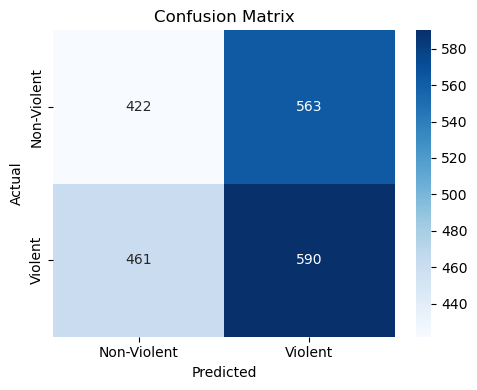

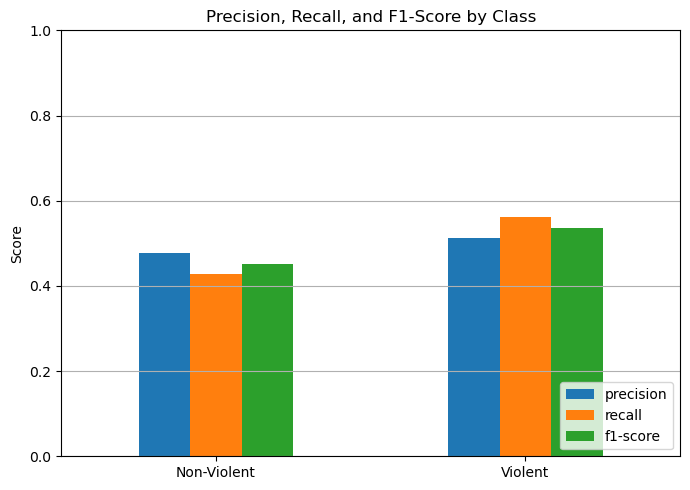

In [2082]:
cm = confusion_matrix(y_test, y_pred)

# Classification Report as dict
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Bar Plot for Precision, Recall, F1-Score
# Extract per-class scores
metrics_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score']].iloc[:2]
metrics_df.index = ['Non-Violent', 'Violent']

metrics_df.plot(kind='bar', figsize=(7, 5))
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### KNN

In [2104]:
# Standardizing the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

In [2106]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Confusion Matrix:
 [[764 221]
 [778 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.78      0.60       985
           1       0.55      0.26      0.35      1051

    accuracy                           0.51      2036
   macro avg       0.52      0.52      0.48      2036
weighted avg       0.52      0.51      0.47      2036



In [2108]:
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("F1 Score - KNN:", f1_knn)

F1 Score - KNN: 0.4749611416266758


### Graph for KNN results

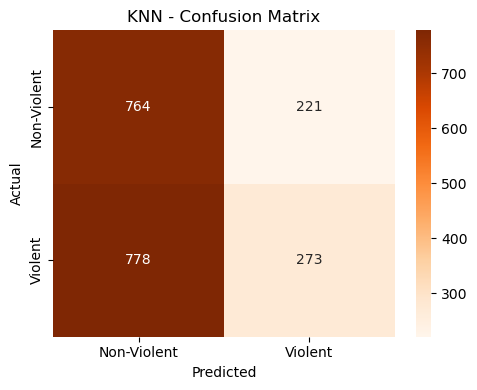

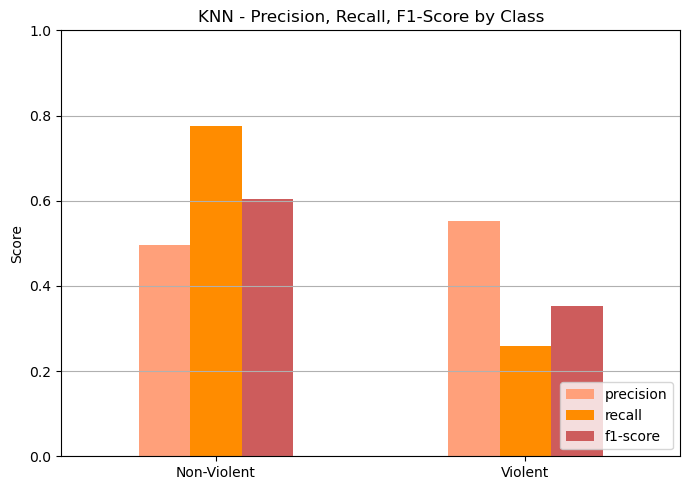

In [2090]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Precision, Recall, F1 Bar Chart
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
metrics_knn_df = pd.DataFrame(report_knn).T[['precision', 'recall', 'f1-score']].iloc[:2]
metrics_knn_df.index = ['Non-Violent', 'Violent']

metrics_knn_df.plot(kind='bar', figsize=(7, 5), color=['#FFA07A', '#FF8C00', '#CD5C5C'])
plt.title('KNN - Precision, Recall, F1-Score by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Willie ---> Descriptive Analytics (Mainly the stats that will be shown on PowerPoint, as well as Text Sentiment Analysis (Extreme of Crime)? 

In [ ]:
display(la_cleaned['Percent Unemployed'].unique())

In [ ]:
percent_unemployed = la_cleaned.groupby('Community')['Percent Unemployed'].mean().reset_index()

In [ ]:
display(percent_unemployed)

In [ ]:
# Sentient analysis of different levels of unemployment (Low, Medium, High)

In [ ]:
pip install nltk

In [ ]:
pip install wordcloud

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#### Low ---> West La (1.6% Unemployed)

In [ ]:
west_la = la_cleaned[la_cleaned['Community'] == 'west la']

In [ ]:
sentience = SentimentIntensityAnalyzer()

In [ ]:
west_la.loc[:, 'Sentiment'] = west_la['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])
display(west_la)

In [ ]:
average_sentiment = west_la['Sentiment'].mean()
print(f'The average severity analysis of crimes in West LA: {average_sentiment}')

#### Medium ----> Mission (3.95% Unemployed)

In [ ]:
mission = la_cleaned[la_cleaned['Community'] == 'mission']

In [ ]:
mission.loc[:, 'Sentiment'] = mission['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])
display(mission)

In [ ]:
mission_average_sentience = mission['Sentiment'].mean()
print(f'The average severity analysis of crimes in Mission Hills: {mission_average_sentience}')

#### High ---> Van Nuys (7.47% Unemployed)

In [ ]:
vannuys = la_cleaned[la_cleaned['Community'] == 'van nuys']
vannuys.loc[:, 'Sentiment'] = vannuys['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])
display(vannuys)

In [ ]:
vannuys_sentience = vannuys['Sentiment'].mean()
print(f'The average severity analysis of crimes in Van Nuys: {vannuys_sentience}')

In [ ]:
display(percent_unemployed)

In [ ]:
# Central

In [ ]:
central = la_cleaned[la_cleaned['Community'] == 'central']
central.loc[:, 'Sentiment'] = central['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])

In [ ]:
central_sentience = central['Sentiment'].mean()
print(f'The average severity analysis of crimes in Central: {central_sentience}')

In [ ]:
# Harbor

In [ ]:
harbor = la_cleaned[la_cleaned['Community'] == 'harbor']
harbor.loc[:, 'Sentiment'] = harbor['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])

In [ ]:
harbor_sentience = harbor['Sentiment'].mean()
print(f'The average severity analysis of crimes in Harbor: {harbor_sentience}')

In [ ]:
# Hollywood

In [ ]:
hollywood = la_cleaned[la_cleaned['Community'] == 'hollywood']
hollywood.loc[:, 'Sentiment'] = hollywood['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])

In [ ]:
hollywood_sentience = hollywood['Sentiment'].mean()
print(f'The average severity analysis of crimes in Hollywood: {hollywood_sentience}')

In [ ]:
# North Hollywood

In [ ]:
n_hollywood = la_cleaned[la_cleaned['Community'] == 'n hollywood']
n_hollywood.loc[:, 'Sentiment'] = n_hollywood['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])

In [ ]:
n_hollywood_sentience = n_hollywood['Sentiment'].mean()
print(f'The average severity analysis of crimes in N Hollywood: {n_hollywood_sentience}')

In [ ]:
# Norwalk

In [ ]:
norwalk = la_cleaned[la_cleaned['Community'] == 'norwalk']
norwalk.loc[:, 'Sentiment'] = norwalk['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])
norwalk_sentience = norwalk['Sentiment'].mean()
print(f'The average severity analysis of crimes in Norwalk: {norwalk_sentience}')

In [ ]:
# Pacific

In [ ]:
pacific = la_cleaned[la_cleaned['Community'] == 'pacific']
pacific.loc[:, 'Sentiment'] = pacific['Charge Group Description'].apply(lambda x: sentience.polarity_scores(x)['compound'])
pacific_sentience = pacific['Sentiment'].mean()
print(f'The average severity analysis of crimes in Pacific: {pacific_sentience}')

In [ ]:
# Create Dataframe with Community and their respective severity analysis

In [ ]:
data14 = {
    'Community': ['west la', 'central', 'harbor', 'hollywood', 'mission', 'n hollywood', 'norwalk', 'pacific', 'van nuys'],
    'Severity of Crime': [average_sentiment, central_sentience, harbor_sentience, hollywood_sentience, mission_average_sentience, n_hollywood_sentience, norwalk_sentience, pacific_sentience, vannuys_sentience]
}

In [ ]:
heinous_df = pd.DataFrame(data14)
display(heinous_df)

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = heinous_df, x = 'Community', y = 'Severity of Crime')

plt.title('Severity of Crimes by Community')
plt.xlabel('Community')
plt.ylabel('Severity of Crime')

plt.show()

## Research Question #2: Does the Unemployment Rate have an affect on the amount of crimes being committed in the area?

In [ ]:
# Now that we have sentience analysis, on the low, medium, and high rates of unemployment, let's visualize the relationship between
#number of crimes and unemployment rate

In [ ]:
la_city_crime_summary = la_cleaned.groupby('Community').agg({
    'Charge Group Description': 'count',
    'Percent Unemployed': 'mean'
}).reset_index()

In [ ]:
display(la_city_crime_summary)

In [ ]:
# Visually

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(la_city_crime_summary['Percent Unemployed'], la_city_crime_summary['Charge Group Description'], color = 'red', s = 100)

for i, row in la_city_crime_summary.iterrows():
    plt.text(row['Percent Unemployed'] + 0.05, row['Charge Group Description'], row['Community'], fontsize=9)

plt.title('Unemployment Rate vs. Crimes (by Community)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Crimes Committed')
plt.show()

In [ ]:
# Correlation of Unemployment Rate and Number of Crimes

In [ ]:
correlation = la_city_crime_summary['Percent Unemployed'].corr(la_city_crime_summary['Charge Group Description'])
print(f'The correlation of unemployment rate and number of crimes is {correlation}')

In [ ]:
# Correlation without outliers (Hollywood)

In [ ]:
outlierless_corr = la_city_crime_summary[la_city_crime_summary['Community'] != 'hollywood']
display(outlierless_corr)

In [ ]:
corr_less_outliers = outlierless_corr['Percent Unemployed'].corr(outlierless_corr['Charge Group Description'])
print(f'The correlation of unemployment rate and number of crimes without any outliers is: {corr_less_outliers}')

## Hypothesis Testing --> Unemployment Rate vs. Number of Crimes

In [ ]:
correlation, p_value = pearsonr(la_city_crime_summary['Percent Unemployed'], la_city_crime_summary['Charge Group Description'])

print('Null Hypotheis: The Unemployment Rate in a given neighborhood has no direct effect on the number of crimes comitted in the given neighborhood')

print(f'The correlation of Unemployment Rate to Number of Crimes being committed: {correlation}')
print(f'P_value for hypothesis test: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is significant correlation between unemployment affecting number of crimes committed.')
else:
    print('Fail to reject the null hypothesis. There is no significant correlation between unemployment affecting number of crimes committed.')
   